監督式學習:迴歸+分類(給電腦有標籤的資料進行學習，有標準答案)

非監督式學習:分群(給電腦沒有標籤的資料，讓它自己找出規則，沒有標準答案)

1.迴歸問題(計算題)

解決問題的方法是預測出一個實際值

最常見的是線性迴歸

2.分類問題(是非題或選擇題)

In [48]:
##  波士頓房價預測_F13

# 1. 載入所需套件
from sklearn.datasets import load_boston
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import LinearRegression #線性迴歸模型
from sklearn.linear_model import Ridge 
from sklearn.model_selection import train_test_split #切分訓練集和測試集的套件
from sklearn.metrics import mean_squared_error #驗證模型的套件

In [49]:
# 2. 載入資料集，觀察資料集
my_data = load_boston()
print(my_data)
print("\n")
print(my_data.keys())
print("\n")

print("資料筆數:")
print(my_data.data.shape)
print("\n")

print("資料的欄位名稱，分別是:")
print(my_data.feature_names)
print("\n")

print("第一筆的資料內容:")
print(my_data.data[0])
print("\n")

print("第一筆的預測目標:")
print(my_data.target[0])
print("\n")

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [50]:
# 3. 切分資料集 - 訓練集 / 測試集
train_x, test_x, train_y, test_y = train_test_split(
        my_data.data, my_data.target, test_size=0.2, random_state=43, shuffle=True)
print("原始資料集的維度大小:" , my_data.data.shape)
print("訓練集的維度大小:" , train_x.shape)
print("測試集的維度大小:" , test_x.shape)

原始資料集的維度大小: (506, 13)
訓練集的維度大小: (404, 13)
測試集的維度大小: (102, 13)


In [51]:
# 4. 訓練模型及驗證模型
my_model = Ridge()
my_model.fit(train_x, train_y)
pred = my_model.predict(test_x)
score = mean_squared_error(pred, test_y) #MSE
print("Ridge模型評估完測試集的MSE:", score) #誤差值越接近0越好，代表預測的值和真實答案相差無幾

my_model = LinearRegression()
my_model.fit(train_x, train_y)
pred = my_model.predict(test_x)
score = mean_squared_error(pred, test_y) #MSE
print("LinearRegression模型評估完測試集的MSE:", score) #誤差值越接近0越好，代表預測的值和真實答案相差無幾

my_model = ARDRegression()
my_model.fit(train_x, train_y)
pred = my_model.predict(test_x)
score = mean_squared_error(pred, test_y) #MSE
print("ARDRegression模型評估完測試集的MSE:", score) #誤差值越接近0越好，代表預測的值和真實答案相差無幾

Ridge模型評估完測試集的MSE: 21.890670950212623
LinearRegression模型評估完測試集的MSE: 22.01861344950045
ARDRegression模型評估完測試集的MSE: 24.005893224567686


In [52]:
# 修改成四個欄位看誤差值有無變小
# 作業:找MSE<27的變數
train_x_f4=train_x[:,[12,11,10,5]]
test_x_f4=test_x[:,[12,11,10,5]]
my_model_f4=Ridge()
my_model_f4.fit(train_x_f4, train_y)
pred = my_model_f4.predict(test_x_f4)
score = mean_squared_error(pred, test_y)
print("模型評估完測試集的MSE: ", score)

模型評估完測試集的MSE:  25.354930765912194


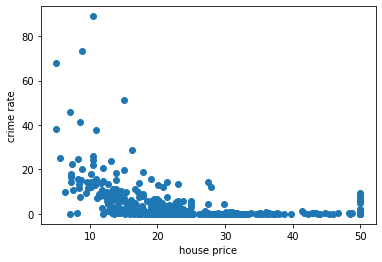

In [53]:
#5犯罪率
#推測犯罪率與房價成反比關係，亦即當犯罪率越高，房價會越低
import pandas as pd # 引入Pandas
from matplotlib import pyplot as plt #繪圖模型

df_data = pd.DataFrame(my_data.data, columns=my_data.feature_names) # 將數據以改成DataFrame的方式呈現
x = my_data.target # 房價數據
y = df_data["CRIM"] # 犯罪率數據

plt.xlabel("house price") # x軸的標題
plt.ylabel("crime rate") # y軸的標題
plt.scatter(x, y) # 繪製散點圖
plt.show() # 顯示圖形

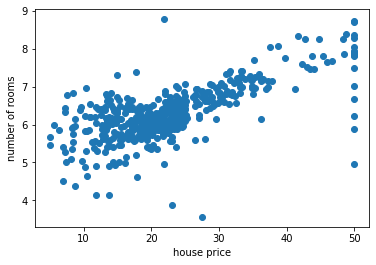

In [54]:
#6房間數
#推測房間數與房價成正相關

x = my_data.target # 房價數據
y = df_data["RM"] # 房間數數據

plt.xlabel("house price") # x軸的標題
plt.ylabel("number of rooms") # y軸的標題
plt.scatter(x, y) # 繪製散點圖
plt.show() # 顯示圖形

In [55]:
#7 資料集df_data增加房價(target)

import seaborn as sns # 引入seaborn
df_data['target']= my_data.target
df_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


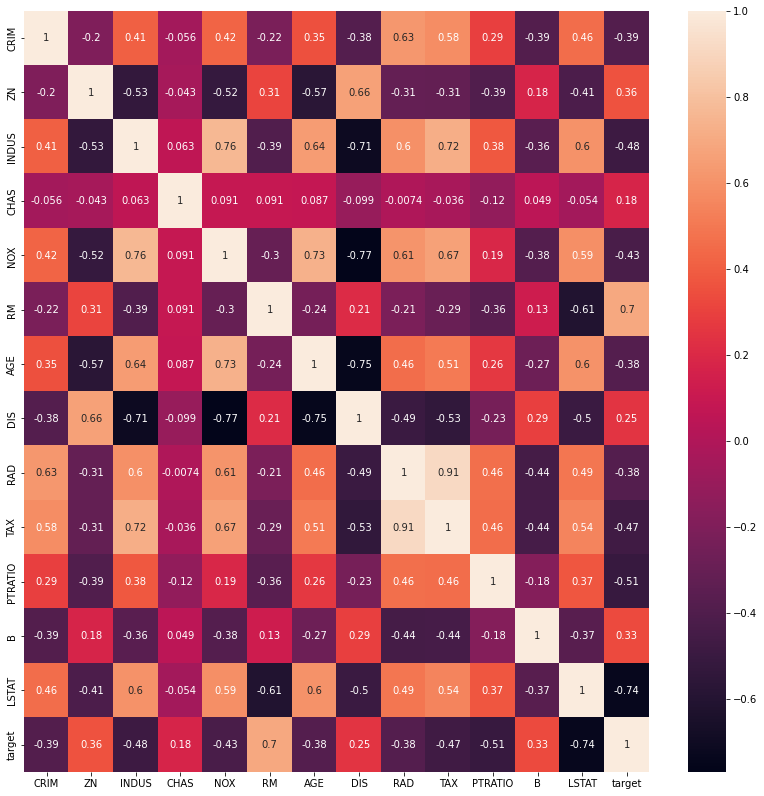

In [56]:
#8 觀察13個特徵與房價相關性
#運用顏色分別低度相關或高度相關

import seaborn as sns # 引入seaborn
import matplotlib.pyplot as plt # 引入pyplot
plt.figure(figsize= (14, 14)) # 圖形大小
sns.heatmap(df_data.corr(),annot = True) # 塗顏色
#sns.heatmap(df_data.corr(),cmap='Blues',annot = True) # 塗顏色 cmap='Blues', cmap='Greens'
plt.show() # 顯示圖形